In [1]:
from devSciPyFST import fst, fstUtils
import graphviz, wavedrom
from IPython.display import display, Markdown

In [2]:
inString = [0,0,1,0,0,1,0]

fstTemp = fst()
print(fstTemp.states)
print(fstTemp.transitionFunction)

fstTemp = fst([], 'S0')
print(fstTemp.states)
print(fstTemp.transitionFunction)

fstTemp.addState('S2 new')
print(fstTemp.states)
print(fstTemp.transitionFunction)

fstTemp.addTransition('S0', 0, 'S2 new')
print(fstTemp.transitionFunction)
fstTemp.addTransition('S0', 1, '42')
print(fstTemp.transitionFunction)
fstTemp.addTransition('S2 new', 0, '42')
print(fstTemp.transitionFunction)
print(fstTemp.states)

fstMoore = fstTemp.deepcopy()
fstMoore.setType('Moore')
fstMoore.addTransition('Moore', 1, 'S0')
fstMealy = fstTemp.deepcopy()
fstMealy.setType('Mealy')
fstMealy.addTransition('Mealy', 1, 'S0')

[]
[]
['S0']
[]
['S0', 'S2 new']
[]
[['S0', 0, 'S2 new']]
[['S0', 0, 'S2 new'], ['S0', 1, '42']]
[['S0', 0, 'S2 new'], ['S0', 1, '42'], ['S2 new', 0, '42']]
['42', 'S0', 'S2 new']


True

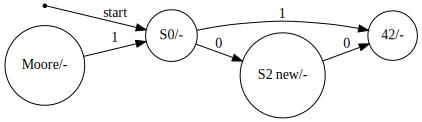

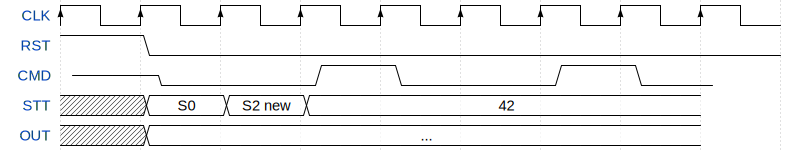

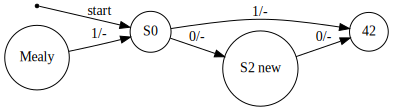

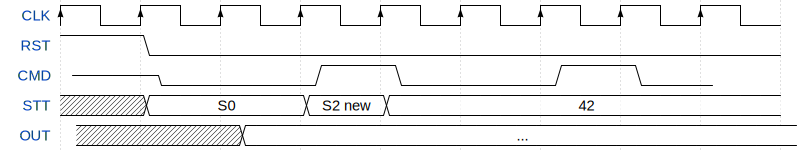

In [3]:
display(graphviz.Source(fstUtils.toDot(fstMoore)))
display(wavedrom.render(fstUtils.playToWave(fstMoore,inString,2,True)))
display(graphviz.Source(fstUtils.toDot(fstMealy)))
display(wavedrom.render(fstUtils.playToWave(fstMealy,inString,2,True)))

In [4]:
print(fstMoore.comboStateAndOutDict)
print(fstMealy.comboStateAndOutDict)

{('S0', 0): ['S2 new', None], ('S0', 1): ['42', None], ('S2 new', 0): ['42', None]}
{('S0', 0): ['S2 new', None], ('S0', 1): ['42', None], ('S2 new', 0): ['42', None]}
